In [1]:
#100*100 matching market
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

# Sample data 
donors_names = ['d' + str(i) for i in range(1, 101)]
recipients_names = ['r' + str(i) for i in range(1, 101)]

# Create an initial matching
initial_match = list(zip(donors_names, recipients_names))

# Load preference matrix data
don_pre= pd.read_csv('C:\\Users\\Hongan Li\\Desktop\\Research Project\\Code\\final_code\\preference matrices\\don_pre_100_2.csv', index_col=0)
reci_pre = pd.read_csv('C:\\Users\\Hongan Li\\Desktop\\Research Project\\Code\\final_code\\preference matrices\\reci_pre_100_2.csv', index_col=0)

In [5]:
#20*20 matching market
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

# Sample data 
donors_names = ['d' + str(i) for i in range(1, 21)]
recipients_names = ['r' + str(i) for i in range(1, 21)]

# Create an initial matching
initial_match = list(zip(donors_names, recipients_names))

# Load preference matrix data
don_pre= pd.read_csv('C:\\Users\\Hongan Li\\Desktop\\Research Project\\Code\\final_code\\preference matrices\\don_pre_20_2.csv', index_col=0)
reci_pre = pd.read_csv('C:\\Users\\Hongan Li\\Desktop\\Research Project\\Code\\final_code\\preference matrices\\reci_pre_20_2.csv', index_col=0)

In [2]:
def find_all_instabilities(matching, reci_pre, don_pre):
    matching_dict = {donor: recipient for donor, recipient in matching}
    instabilities = {}

    for donor, recipient in matching_dict.items():
        # Index of the recipient in the donor's preference list
        matched_recipient_rank = don_pre.loc[donor, recipient]
        donor_preferences = don_pre.loc[donor]

        # Check all recipients above the matched recipient in donor's preferences
        preferred_recipients = donor_preferences[donor_preferences < matched_recipient_rank].index.tolist()

        for other_recipient in preferred_recipients:
            # Find the other donor matched to the other recipient
            other_donor_list = [d for d, r in matching if r == other_recipient]
            if other_donor_list:
                other_donor = other_donor_list[0]

                # If the other recipient prefers this donor over their current match
                if reci_pre.loc[other_recipient, donor] < reci_pre.loc[other_recipient, other_donor]:
                    donor_preference_score = don_pre.loc[donor, other_recipient]
                    recipient_preference_score = reci_pre.loc[other_recipient, donor]
                    instabilities[(donor, other_recipient)] = (donor_preference_score, recipient_preference_score)
    
    return instabilities

In [3]:
import random
import math
import matplotlib.pyplot as plt
import time

def calculate_penalty(matching, reci_pre, don_pre):
    instabilities = find_all_instabilities(matching, reci_pre, don_pre)
    return len(instabilities), instabilities

def neighbor1(current_solution):
    new_solution = current_solution.copy()
    i, j = random.sample(range(len(new_solution)), 2)
    new_solution[i], new_solution[j] = (
        (new_solution[j][0], new_solution[i][1]),
        (new_solution[i][0], new_solution[j][1]),
    )
    return new_solution

def simulated_annealing1(matching, reci_pre, don_pre, initial_temperature, cooling_rate, max_iterations):
    current_solution = matching.copy()
    current_temperature = initial_temperature

    # Lists to record temperature and penalty at each iteration
    temperatures = []
    penalties = []

    # def calculate_penalty(matching):
    #     instabilities = find_all_instabilities(matching, reci_pre, don_pre)
    #     return len(instabilities), instabilities

    best_solution = current_solution.copy()
    best_penalty, _ = calculate_penalty(best_solution, reci_pre, don_pre)

    start_time = time.time()

    for iteration in range(max_iterations):
        # Generate a new solution using the neighborhood search function
        new_solution = neighbor1(current_solution)

        new_penalty, _ = calculate_penalty(new_solution, reci_pre, don_pre)
        current_penalty, _ = calculate_penalty(current_solution, reci_pre, don_pre)

        temperatures.append(current_temperature)
        penalties.append(current_penalty)

        if new_penalty < current_penalty or random.random() < math.exp((current_penalty - new_penalty) / current_temperature):
            current_solution = new_solution
            if new_penalty < best_penalty:
                best_solution = new_solution
                best_penalty = new_penalty

        current_temperature *= cooling_rate
        if current_temperature < 1e-10:
            break

    end_time = time.time()
    time_taken = end_time - start_time

    return best_solution, best_penalty, temperatures, penalties, time_taken


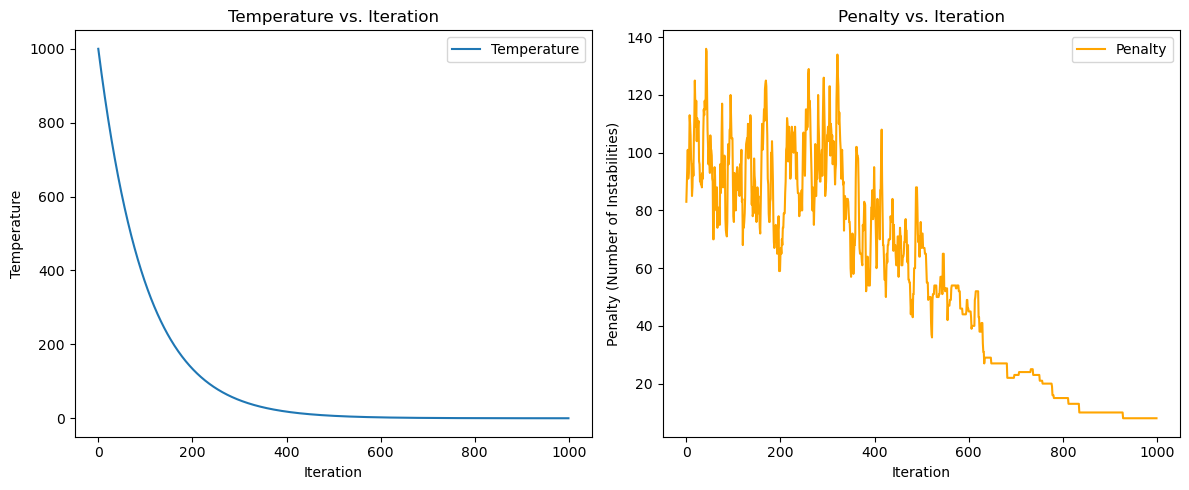

Final Matching: [('d20', 'r1'), ('d2', 'r2'), ('d15', 'r3'), ('d11', 'r4'), ('d5', 'r5'), ('d13', 'r6'), ('d19', 'r7'), ('d4', 'r8'), ('d17', 'r9'), ('d8', 'r10'), ('d16', 'r11'), ('d7', 'r12'), ('d3', 'r13'), ('d9', 'r14'), ('d1', 'r15'), ('d6', 'r16'), ('d18', 'r17'), ('d14', 'r18'), ('d12', 'r19'), ('d10', 'r20')]
Final Penalty: 8
Time Taken: 23.24 seconds


In [6]:
# Run the simulated annealing algorithm and plot the cooling curve and penalty convergence
# Initial parameters
initial_temperature = 1000
cooling_rate = 0.99
max_iterations = 1000
random.seed(0)

# Assuming initial_match, reci_pre, and don_pre are already defined

# Run the simulated annealing algorithm
optimized_matching, final_penalty, temperatures, penalties, time_taken = simulated_annealing1(
    initial_match, reci_pre, don_pre, initial_temperature, cooling_rate, max_iterations)

# Plot the temperature and penalty versus iteration
iterations = list(range(len(temperatures)))

plt.figure(figsize=(12, 5))

# Plot temperature curve
plt.subplot(1, 2, 1)
plt.plot(iterations, temperatures, label='Temperature')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature vs. Iteration')
plt.legend()

# Plot penalty curve
plt.subplot(1, 2, 2)
plt.plot(iterations, penalties, label='Penalty', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Penalty (Number of Instabilities)')
plt.title('Penalty vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print("Final Matching:", optimized_matching)
print("Final Penalty:", final_penalty)
print(f"Time Taken: {time_taken:.2f} seconds")

In [9]:
instabilty = find_all_instabilities(optimized_matching, reci_pre, don_pre)

if instabilty:
    print('The blocking pairs are:')
    for i in instabilty:
        print(i)
else:
    print('The matching is stable.')

The blocking pairs are:
('d5', 'r12')
('d19', 'r13')
('d7', 'r14')
('d9', 'r1')
('d1', 'r11')
('d1', 'r13')
('d12', 'r20')
('d10', 'r12')
